<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/fasle4class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning
Chapter4
# Fundamentals of machine learning

This chapter covers 
# •	Forms of machine learning beyond classification and regression 
# •	Formal evaluation procedures for machine learning models 
# •	Preparing data for deep learning 
# •	Feature engineering 
# •	Tackling over fitting 
# •	The universal workflow for approaching machine learning problems


یادگیری ماشینی : چهار زیر شاخه اصلی دارد.
1.	یادگیری نظارت شده
2.	یادگیری غیر نظارت شده
3.	یادگیری خود نظارتی
4.	یادگیری تقویتی


# توضیح یادگیری خود نظارتی (متن انگلیسی بهترین توضیح ممکن بود)
human-annotated labels—you can think of it as supervised learning without any
humans in the loop. There are still labels involved (because the learning has to be
supervised by something), but they’re generated from the input data, typically using a
heuristic algorithm.

# توضیح یادگیری خود تقویتی:
به عنوان مثال، یک شبکه عصبی که به یک صفحه بازی ویدیویی نگاه می کند و اقدامات بازی را به منظور به حداکثر رساندن امتیاز آن خروجی در نظر می گیرد، و می تواند آن شبکه عصبی را بر اساس این امتیازات کسب شده آموزش داد

بیایید سه دستور العمل ارزیابی کلاسیک را مرور کنیم: 
# •	اعتبار سنجی ساده نگهدارنده
# •	اعتبار سنجی   K-fold  
# •	اعتبار سنجی K-fold تکراری با درهم ریختن.


In [2]:
from keras import models
from keras import layers
def build_model():
 model = models.Sequential()
 model.add(layers.Dense(64, activation='relu',
 input_shape=(train_data.shape[1],)))
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(1))
 model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
 return model

 اعتبار سنجی ساده نگهدارنده
 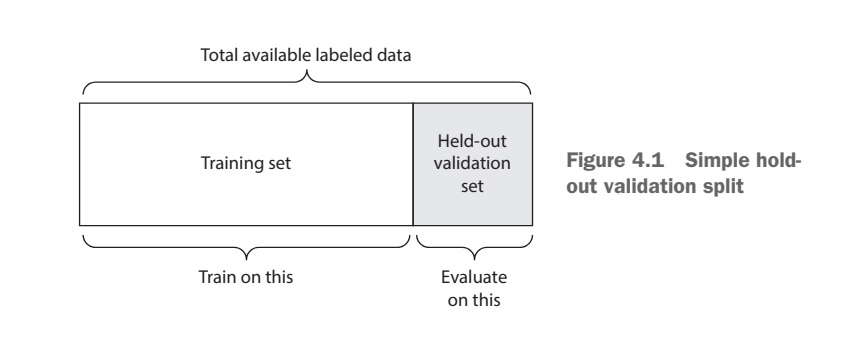

In [1]:
num_validation_samples = 10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
training_data = data[:]
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)
# At this point you can tune your model,
# retrain it, evaluate it, tune it again...
model = get_model()
model.train(np.concatenate([training_data,validation_data]))
test_score = model.evaluate(test_data)

NameError: ignored

# K-FOLD VALIDATION
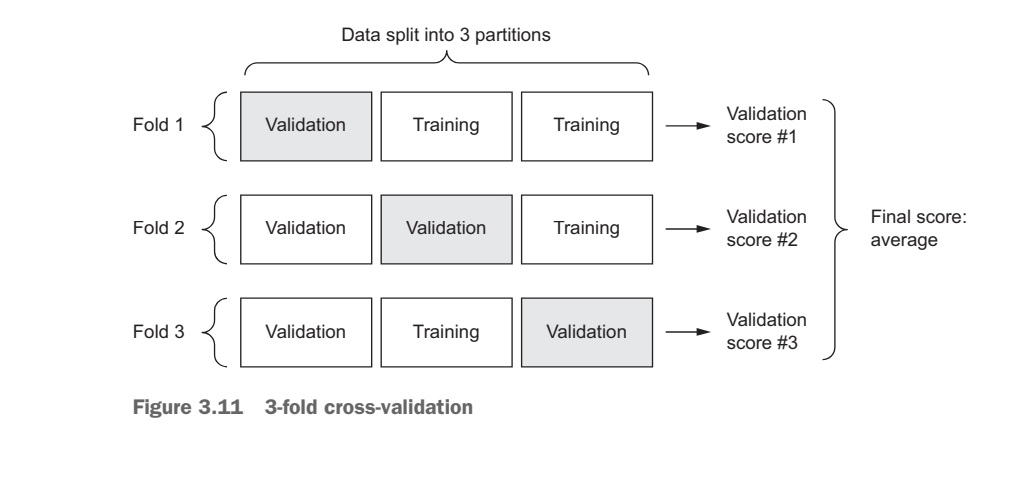

In [ ]:
k=4
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
  validation_data = data[num_validation_samples * fold:num_validation_samples * (fold + 1)]
  training_data = data[:num_validation_samples * fold] + data[num_validation_samples * (fold + 1):]
  model = get_model()
  model.train(training_data)
  validation_score = model.evaluate(validation_data)
  validation_scores.append(validation_score)
validation_score = np.average(validation_scores)
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)

هدف پیش‌پردازش داده‌ها این است که داده‌های خام در دسترس را برای شبکه های عصبی بیشتر سازگار کنیم . این شامل برداری سازی، نرمال سازی ، مدیریت مقادیر از دست رفته واستخراج ویژگی است

# VECTORIZATION
تمام ورودی ها و اهداف در یک شبکه عصبی باید تانسورهای داده های ممیز شناور باشند (یا در
موارد خاص، تانسورهای اعداد صحیح). هر داده ای که برای پردازش نیاز دارید - صدا،
تصاویر، متن

# VALUE NORMALIZATION
# به طور معمول، بیشتر مقادیر باید در محدوده 0-1 باشند.
# همگن باشند—یعنی همه ویژگی ها باید مقادیر تقریباً یکسانی داشته باشند


#  Normalize each feature independently to have a mean of 0.
#  Normalize each feature independently to have a standard deviation of 1.
This is easy to do with Numpy arrays:


In [ ]:
x -= x.mean(axis=0)
x /= x.std(axis=0)

راههای مقابله با بیش برازش
# اولین راهکار کوچک کردن سایز شبکه 
# دومین راهکار منظم کردن توزیع وزنها در شبکه یعنی وزنهای شبکه را مجبور کنیم که مقادیر کوچکی بگیرند تا با این روش کل وزن مورد نیاز شبکه در تمام بخش های آن توزیع شود
L1 regularization نرم اول
L2 regularization نرم دوم

Adding L2 weight regularization to the model

In [ ]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Different weight regularizers available in Keras

In [ ]:
from keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

راهکار دیگر مقابله با بیش برازش استفاده کردن از لایه دراپ اوت میباشد

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

خلاصه راهکارهای مبارزه با بیش برازش
# Recap
 The most common ways to prevent overfitting in neural networks:
# ❑ Get more training data.
# ❑ Reduce the capacity of the network.
# ❑ Add weight regularization.
# ❑ Add dropout.


## The universal workflow of machine learning
# ❑ 1. Defining the problem and assembling a dataset
# ❑2. Choosing a measure of success
# ❑3. Deciding on an evaluation protocol
# ❑4. Preparing your data
# ❑5. Developing a model that does better than a baseline
# ❑6. Scaling up: developing a model that overfits
# ❑7. Regularizing your model and tuning your hyperparameters

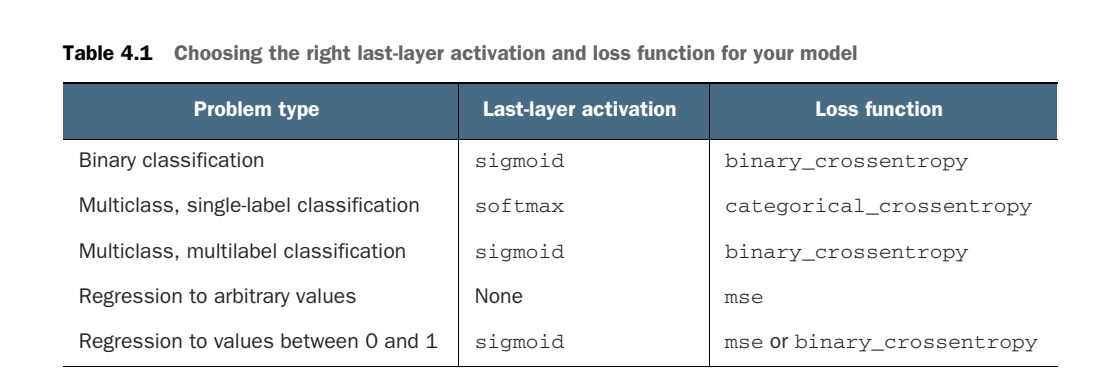